In [1]:
import random
import matplotlib.pyplot as plt
import math
import time
import numpy as np

In [2]:
class Particle(object):
    
    def __init__(self,pid):
        self.id = pid
        self._equals = []
        self._differs = []
        
    def __eq__(self,other):
        return self.__cmp__(other) == 0
    
    def __neq__(self,other):
        return not self == other
    
    def __lt__(self,other):
        return self.__cmp__(other) == -1

    def __gt__(self,other):
        return self.__cmp__(other) == 1
    
    def __cmp__(self,other):
        if other.id in self._equals:
            return 0
        elif other.id in self._differs:
            return 1
        elif -other.id in self._differs:
            return -1
        else:
            cmp = random.choice([0,1,-1])
            if cmp == 0:
                self._equals.append(other.id)
                other._equals.append(self.id)
            elif cmp == 1:
                self._differs.append(other.id)
                other._differs.append(-self.id)
            else:
                self._differs.append(-other.id)
                other._differs.append(self.id)

In [3]:
def method_comp(N,ncomp):

    #Create N particles:
    allPtc = [Particle(pid=i) for i in range(N)]
    for ptcA in allPtc:
        for ptcB in allPtc:
            x = (ptcA.__cmp__(ptcB))
            
    #Compare particles ncomp times:
    iA = [random.randint(0,N-1) for n in range(ncomp)]
    iB = [random.randint(0,N-1) for n in range(ncomp)]
    start_time = time.time()    
    for n in range(ncomp):
        x = allPtc[iA[n]] == allPtc[iB[n]]
    return(time.time()-start_time)

In [4]:
def method_compSet(N,ncomp):

    #Create N particles:
    allPtc = [Particle(pid=i) for i in range(N)]
    for ptcA in allPtc:        
        for ptcB in allPtc:  
            x = (ptcA.__cmp__(ptcB))
            
        ptcA._equals = set(ptcA._equals)
        ptcA._differs = set(ptcA._differs)
    
    #Compare particles ncomp times:
    iA = [random.randint(0,N-1) for n in range(ncomp)]
    iB = [random.randint(0,N-1) for n in range(ncomp)]
    start_time = time.time()    
    for n in range(ncomp):
        x = allPtc[iA[n]] == allPtc[iB[n]]
    return(time.time()-start_time)

In [5]:
def method_compMatrix(N,ncomp):

    #Create N particles:
    allPtc = [Particle(pid=i) for i in range(N)]
    #Create matrix:
    distanceMatrix = np.zeros((N,N))
    for ptcA in allPtc:        
        for ptcB in allPtc:
            distanceMatrix[ptcA.id,ptcB.id] = (ptcA.__cmp__(ptcB))
    
    #Compare particles ncomp times:
    iA = [random.randint(0,N-1) for n in range(ncomp)]
    iB = [random.randint(0,N-1) for n in range(ncomp)]
    start_time = time.time()
    for n in range(ncomp):
        x = distanceMatrix[allPtc[iA[n]].id,allPtc[iB[n]].id]
    return(time.time()-start_time)

In [6]:
def method_compMatrixList(N,ncomp):

    #Create N particles:
    allPtc = [Particle(pid=i) for i in range(N)]
    #Create matrix:
    distanceMatrix = np.zeros((N,N))
    for ptcA in allPtc:        
        for ptcB in allPtc:
            distanceMatrix[ptcA.id,ptcB.id] = (ptcA.__cmp__(ptcB))
    
    distanceMatrix = distanceMatrix.tolist()
    #Compare particles ncomp times:
    iA = [random.randint(0,N-1) for n in range(ncomp)]
    iB = [random.randint(0,N-1) for n in range(ncomp)]
    start_time = time.time()    
    for n in range(ncomp):
        x = distanceMatrix[allPtc[iA[n]].id][allPtc[iB[n]].id]
    return(time.time()-start_time)

In [7]:
def method_compTag(N,ncomp):

    #Create N particles:
    allPtc = [Particle(pid=i) for i in range(N)]
    sortedPtc = sorted(allPtc)
    ncounter = 0
    for i,ptc in enumerate(sortedPtc[:-1]):
        ptc._id = ncounter
        if sortedPtc[i+1] != ptc:
            ncounter += 1
    sortedPtc[-1]._id = ncounter
    
    #Compare particles ncomp times:
    iA = [random.randint(0,N-1) for n in range(ncomp)]
    iB = [random.randint(0,N-1) for n in range(ncomp)]
    start_time = time.time()    
    for n in range(ncomp):
        x = allPtc[iA[n]]._id == allPtc[iB[n]]._id
    return(time.time()-start_time)

In [12]:
def profile():
    time_method_A = []
    time_method_B = []
    time_method_C = []
    
    Nptc = 200

    ncompList = [x for x in range(100000,5000000,500000)]
    for ncomp in ncompList:
        time_method_A.append(math.log10(method_compSet(Nptc,ncomp)))
        time_method_B.append(math.log10(method_compMatrixList(Nptc,ncomp)))
        time_method_C.append(math.log10(method_compTag(Nptc,ncomp)))

    
    rAB = np.power(10,np.array(time_method_A))/np.power(10,np.array(time_method_B))
    rBC = np.power(10,np.array(time_method_B))/np.power(10,np.array(time_method_C))
    rAC = np.power(10,np.array(time_method_A))/np.power(10,np.array(time_method_C))
    plt.plot(ncompList,time_method_A,marker='o',color='r',linestyle='-',label='set (default)')
    plt.plot(ncompList,time_method_B,marker='o',color='b',linestyle='-',label='matrix')
    plt.plot(ncompList,time_method_C,marker='o',color='g',linestyle='-',label='ordered ids')
    plt.xlabel('number of comparisons', fontsize=18)
    plt.ylabel('log10(time)', fontsize=18)
    plt.legend(loc = 'upper left')
    plt.show()
    plt.plot(ncompList,rAB,label='A/B')
    plt.plot(ncompList,rBC,label='B/C')
    plt.plot(ncompList,rAC,label='A/C')
    plt.legend(loc = 'upper left')
    plt.show()

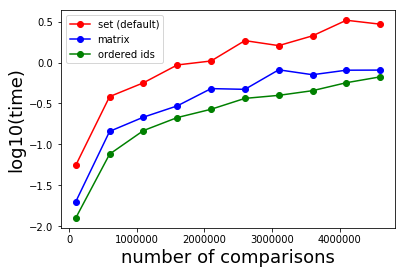

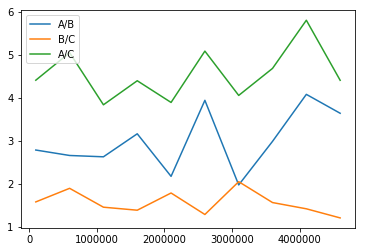

In [13]:
profile()

In [10]:
x = np.array([1.,2.,3])
y = np.array([1.,1.,2.])
x/y

array([1. , 2. , 1.5])

In [11]:
x = 1
y = 2
print(x > y)

False
